# Implementing Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generating Features and Labels

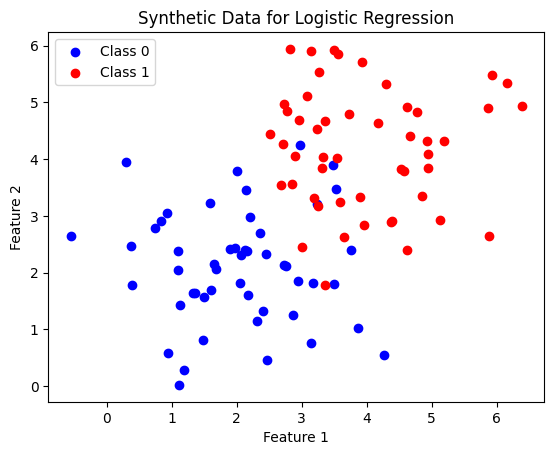

In [3]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate 50 data points for Class 0
x_class0 = np.random.normal(loc=2.0, scale=1.0, size=(50, 2))  # Cluster around (2, 2)
y_class0 = np.zeros((50, 1))  # Label 0

# Generate 50 data points for Class 1
x_class1 = np.random.normal(loc=4.0, scale=1.0, size=(50, 2))  # Cluster around (4, 4)
y_class1 = np.ones((50, 1))  # Label 1

# Stack features and labels for both classes
X = np.vstack((x_class0, x_class1))
y = np.vstack((y_class0, y_class1))

plt.scatter(X[:50, 0], X[:50, 1], color='blue', label="Class 0")
plt.scatter(X[50:, 0], X[50:, 1], color='red', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Synthetic Data for Logistic Regression")
plt.show()



## Step 1: Hypothesis Function

In [12]:
theta_0 = 0
theta_1 = 0
iterations = 1000
learning_rate = 0.001
m = len(X)

In [20]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def h(X, theta_0, theta_1):
    return sigmoid_function(theta_0 + (theta_1 * X))

In [22]:
def compute_cost(X, y, theta_0, theta_1):
    predictions = h(X, theta_0, theta_1)
    cost = -1/m * np.sum(y * np.log(predictions) + (1-y) * np.log(1-predictions))
    return cost

In [23]:
def compute_gradient(X, y, theta_0, theta_1):
    predictions = h(X, theta_0, theta_1)
    d_theta_0 = 1/m * np.sum(predictions - y)
    d_theta_1 = 1/m * np.sum((predictions - y) * X) 
    return d_theta_0, d_theta_1

In [29]:
def gradient_descent(X,y,theta_0, theta_1, iterations, lr):

    cost_history = []
    for i in range(iterations):
        d_theta_0, d_theta_1 = compute_gradient(X, y, theta_0, theta_1)
        theta_0 -= lr * d_theta_0
        theta_1 -= lr * d_theta_1
        cost = compute_cost(X, y, theta_0, theta_1)
        if i % 100 == 0:
            print(f'Iteration {i}, the Cross Entropy Loss is: {cost:.4f}')

    return theta_0, theta_1, cost_history

def gradient_descent(X,y,theta_0, theta_1, iterations, lr):

    cost_history = []
    for i in range(iterations):
        d_theta_0, d_theta_1 = compute_gradient(X, y, theta_0, theta_1)
        theta_0 -= lr * d_theta_0
        theta_1 -= lr * d_theta_1
        cost = compute_cost(X, y, theta_0, theta_1)
        if i % 100 == 0:
            print(f'Iteration {i}, the Cross Entropy Loss is: {cost:.4f}')

    return theta_0, theta_1, cost_history

In [30]:
def predict(x, theta_0, theta_1, threshold = 0.5):
    probabilities = h(x, theta_0, theta_1)
    return (probabilities >= threshold).astype(int)

Iteration 0, the Cross Entropy Loss is: 4.0858
Iteration 100, the Cross Entropy Loss is: 3.5919
Iteration 200, the Cross Entropy Loss is: 3.1196
Iteration 300, the Cross Entropy Loss is: 2.6865
Iteration 400, the Cross Entropy Loss is: 2.3201
Iteration 500, the Cross Entropy Loss is: 2.0503
Iteration 600, the Cross Entropy Loss is: 1.8854
Iteration 700, the Cross Entropy Loss is: 1.8000
Iteration 800, the Cross Entropy Loss is: 1.7577
Iteration 900, the Cross Entropy Loss is: 1.7339


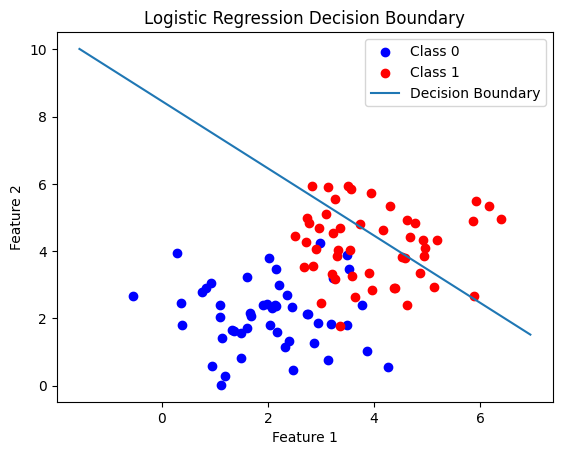

In [33]:
theta_0 = 2
theta_1 = 1
iterations = 1000
learning_rate = 0.001

# training model 
theta_0, theta_1, cost_history = gradient_descent(X, y, theta_0, theta_1, iterations, learning_rate)

# Plot the decision boundary
x_values = [np.min(X[:, 0] - 1), np.max(X[:, 1] + 1)]
y_values = - (theta_0 + np.dot(theta_1, x_values)) / theta_1

plt.scatter(X[:50, 0], X[:50, 1], color='blue', label="Class 0")
plt.scatter(X[50:, 0], X[50:, 1], color='red', label="Class 1")
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()
